# Final Project Submission

* Student Name: **James Toop**
* Student Pace: **Self Paced**
* Scheduled project review date/time: **TBC**
* Instructor name: **Jeff Herman**
* Blog post URL: **TBC**

## Data Discovery and EDA

First step is to have a poke around in the data and see what data / fields we have and to see if we can create relationships between this disparate datasets or simply investigate each dataset separately.

As a reminder here are the data sources:

* Box Office Mojo
* IMDb
* Rotten Tomatoes
* TheMovieDB.org

In [8]:
# Import the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Box Office Mojo dataset

#### Description

The [Box Office Mojo](https://www.boxofficemojo.com/) dataset provides us with Gross Income figures, both US Domestic and Foreign, by film title and studio between 2010 and 2018.  The Foreign Gross Income figures are less complete than the US Domestic figures.

#### EDA

* Which studios have been producing the most films?
* Year on year comparison of Gross Income (US Domestic and Foreign)? 


In [9]:
# Import the Box Office Mojo data and inspect the data types

df_bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip', header=0, thousands=",")
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null float64
year              3387 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [343]:
df_bom.describe()

,domestic_gross,foreign_gross,year
count,3.359000e+03,2.037000e+03,3387.000000
mean,2.874585e+07,7.487281e+07,2013.958075
std,6.698250e+07,1.374106e+08,2.478141
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.200000e+05,3.700000e+06,2012.000000
50%,1.400000e+06,1.870000e+07,2014.000000
75%,2.790000e+07,7.490000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


In [171]:
df_bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [10]:
# Handle missing values and datatypes to aide analysis

pd.set_option('display.max_rows', df_bom.shape[0]+1)
df_bom[['domestic_gross', 'foreign_gross']] = df_bom[['domestic_gross', 'foreign_gross']].fillna(0).astype(int)
df_bom[['year']] = df_bom[['year']].astype(str)
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3387 non-null int64
foreign_gross     3387 non-null int64
year              3387 non-null object
dtypes: int64(2), object(3)
memory usage: 132.4+ KB


In [345]:
# Inspect incorrect looking data for the following films:

incorrect_df = df_bom[df_bom.title.isin(['The Fate of the Furious', 
                                         'Jurassic World',
                                         'Star Wars: The Force Awakens',
                                         'Furious 7',
                                         'Avengers: Infinity War'
                                        ])] 
incorrect_df

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000,1131,2015
1873,Jurassic World,Uni.,652300000,1019,2015
1874,Furious 7,Uni.,353000000,1163,2015
2760,The Fate of the Furious,Uni.,226000000,1010,2017
3079,Avengers: Infinity War,BV,678800000,1369,2018


In [11]:
# Handle the incorrect foreign gross income data, out by a factor of 1,000,000 for the following films:
#  - The Fate of the Furious
#  - Jurassic World
#  - Star Wars: The Force Awakens
#  - Furious 7
#  - Avengers: Infinity War

df_bom.loc[df_bom.title.isin(['The Fate of the Furious',
                              'Jurassic World',
                              'Star Wars: The Force Awakens',
                              'Furious 7',
                              'Avengers: Infinity War'
                             ]) & (df_bom.foreign_gross < 1e6), 'foreign_gross'] = df_bom['foreign_gross'] * 1e6


corrected_df = df_bom[df_bom.title.isin(['The Fate of the Furious', 
                                         'Jurassic World',
                                         'Star Wars: The Force Awakens',
                                         'Furious 7',
                                         'Avengers: Infinity War'
                                        ])] 
corrected_df

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000,1.131000e+09,2015
1873,Jurassic World,Uni.,652300000,1.019000e+09,2015
1874,Furious 7,Uni.,353000000,1.163000e+09,2015
2760,The Fate of the Furious,Uni.,226000000,1.010000e+09,2017
3079,Avengers: Infinity War,BV,678800000,1.369000e+09,2018


In [7]:
# Handle any potential duplicates within the dataset based on film title and studio and sort by year

df_bom = df_bom.sort_values('year').drop_duplicates(subset=['title', 'studio'])


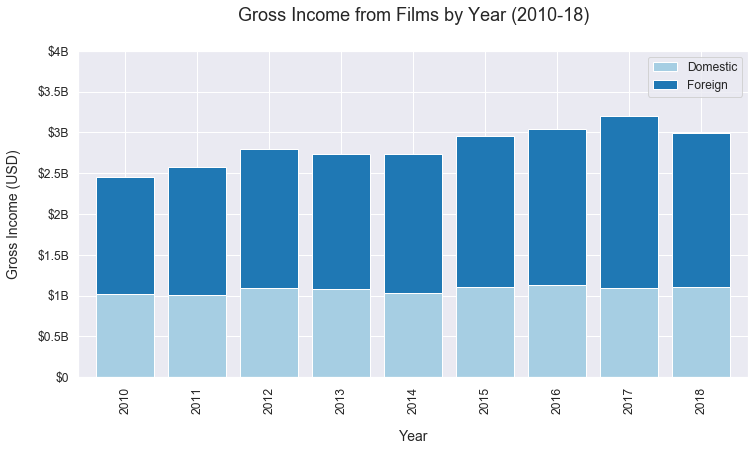

In [46]:
# Creating our first plot looking at Gross Income from Films year-on-year
sns.set(font_scale=1.1)
sns.set_palette(sns.color_palette("Paired"))

existing_yvalues = [0,0.5e10,1e10,1.5e10,2e10,2.5e10,3e10,3.5e10,4e10]
readable_yvalues = ['$0','$0.5B','$1B','$1.5B','$2B','$2.5B','$3B','$3.5B','$4B']
chart_data = df_bom[['year','domestic_gross','foreign_gross']].set_index('year').groupby('year').sum()
chart_data.plot(kind='bar', stacked=True, figsize=(12,6), width=0.8)
plt.ylim(0,4e10)
plt.yticks(existing_yvalues, readable_yvalues)
plt.title("Gross Income from Films by Year (2010-18)", fontsize=18, pad=30)
plt.xlabel("Year", fontsize=14, labelpad=16)
plt.ylabel("Gross Income (USD)", fontsize=14, labelpad=16)
plt.legend(['Domestic','Foreign'])

plt.show()

##  IMDb Dataset

In [13]:
#Importing the csv files from IMDB
df_2 = pd.read_csv('zippedData/imdb.title.basics.csv.gz', compression='gzip', header=0)

df_2.info()
df_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [14]:
df_3 = pd.read_csv('zippedData/imdb.title.ratings.csv.gz', compression='gzip', header=0)

df_3.info()
df_3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [24]:
#Importing the csv files from Rotten Tomatoes - N.B. tab separated
df_4 = pd.read_csv('zippedData/rt.movie_info.tsv.gz', compression='gzip', header=0, sep='\t', encoding= 'unicode_escape')

df_4.info()
df_4.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
id              1560 non-null int64
synopsis        1498 non-null object
rating          1557 non-null object
genre           1552 non-null object
director        1361 non-null object
writer          1111 non-null object
theater_date    1201 non-null object
dvd_date        1201 non-null object
currency        340 non-null object
box_office      340 non-null object
runtime         1530 non-null object
studio          494 non-null object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures
